<a href="https://colab.research.google.com/github/juno2856/deeplearning/blob/master/NLP/%EC%87%BC%ED%95%91%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f98d4e0f7d0>)

In [ ]:
df = pd.read_table('ratings_total.txt', names = ['star','review'])

In [ ]:
print(len(df))

200000


In [ ]:
df.drop_duplicates(subset = ['review'], inplace = True)

In [ ]:
df = df.dropna(how = 'any')

In [ ]:
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['review']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                                                   배공빠르고 굿
1                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2         아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4                          민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                ...                        
199995                                         장마라그런가 달지않아요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                         넘이쁘고 쎄련되보이네요
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: review, Length: 199908, dtype: object

In [ ]:
print(df.head())

   star                                             review
0     5                                            배공빠르고 굿
1     2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2     5  아주좋아요 바지 정말 좋아서개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉성...
3     2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4     5                   민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [ ]:
df = df.sort_values(by=['star'],axis =0)

In [ ]:
print(df['star'].unique())

[1 2 4 5]


In [ ]:
df['star'] = df['star'].astype(str)

In [ ]:
print(type(df['star'][0]))

<class 'str'>


In [ ]:
!pip install sentencepiece

In [ ]:
import sentencepiece as spm
with open('shopping_review.txt', 'w', encoding ='utf8') as f:
  f.write('\n'.join(df['review']))
temp_file = 'shopping_review.txt'
vocab_size = 10000

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size)
)

In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')
def sp_tokenize(s, corpus):

  tensor = []

  for sen in corpus:
    tensor.append(s.EncodeAsIds(sen))
  
  with open('./korean_spm.vocab', 'r') as f:
    vocab = f.readlines()

  word_index = {}
  index_word = {}

  for idx, line in enumerate(vocab):
    word = line.split('\t')[0]

    word_index.update({idx:word})
    index_word.update({word:idx})

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')

  return tensor, word_index, index_word

In [ ]:
data = list(df['review'])
target = list(df['star'])

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [ ]:
x_train_tensor,word_index,index_word = sp_tokenize(s, x_train)
x_test_tensor,_,_ = sp_tokenize(s, x_test)

In [ ]:
print(len(word_index))

10000


In [ ]:
print(y_train)

In [ ]:
y_train = to_categorical(y_train)
print(y_train)
y_test = to_categorical(y_test)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test.dtype

dtype('float32')

In [ ]:
print((x_train_tensor))

In [ ]:
y_train = np.array(list(y_train)).reshape(-1,1)
y_valid = np.array(list(y_valid)).reshape(-1,1)

In [ ]:
print(y_train.shape)

(159926, 6)


In [ ]:
print(x_train_tensor.shape)
print(y_train.shape)

(159926, 99)
(159926, 6)


In [ ]:
# vocab_size = 15000
# word_vector_dim = 20

# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size, word_vector_dim,input_shape=(None,)))
# model.add(keras.layers.LSTM(60, return_sequences= True))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(5, activation = 'softmax'))
# model.summary()

# 이걸로는 안돌아감 .. why? 모름

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 20)          300000    
                                                                 
 lstm_1 (LSTM)               (None, None, 60)          19440     
                                                                 
 dropout_1 (Dropout)         (None, None, 60)          0         
                                                                 
 dense_2 (Dense)             (None, None, 32)          1952      
                                                                 
 dense_3 (Dense)             (None, None, 5)           165       
                                                                 
Total params: 321,557
Trainable params: 321,557
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vocab_size = 20000
embedding_dim = 128
hidden_units = 128
num_classes = 6

abc = keras.Sequential()
abc.add(keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
abc.add(keras.layers.LSTM(hidden_units))
abc.add(keras.layers.Dropout(0.3))
# abc.add(keras.layers.LSTM(128))
# abc.add(keras.layers.Dropout(0.3))
abc.add(keras.layers.Dense(num_classes, activation = 'softmax'))
abc.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_15 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 774       
                                                                 
Total params: 2,692,358
Trainable params: 2,692,358
Non-trainable params: 0
_________________________________________________________________


In [ ]:
abc.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
epochs = 100

In [ ]:
print(x_train_tensor.shape)
print(y_train.shape)

(159926, 128)
(159926,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_loss', model = 'max', verbose =1, save_best_only = True)

In [ ]:
history = abc.fit(x_train_tensor, y_train,  
                    batch_size = 512, epochs = 10000, callbacks=[es, mc], validation_data =(x_test_tensor, y_test))

Epoch 1/10000
313/313 [==============================] - ETA: 0s - loss: 1.2851 - accuracy: 0.3949
Epoch 1: val_loss improved from inf to 1.26497, saving model to best_model.h5
313/313 [==============================] - 312s 993ms/step - loss: 1.2851 - accuracy: 0.3949 - val_loss: 1.2650 - val_accuracy: 0.4050
Epoch 2/10000
313/313 [==============================] - ETA: 0s - loss: 1.2651 - accuracy: 0.4045
Epoch 2: val_loss improved from 1.26497 to 1.26402, saving model to best_model.h5
313/313 [==============================] - 312s 997ms/step - loss: 1.2651 - accuracy: 0.4045 - val_loss: 1.2640 - val_accuracy: 0.4050
Epoch 3/10000
313/313 [==============================] - ETA: 0s - loss: 1.2632 - accuracy: 0.4061
Epoch 3: val_loss improved from 1.26402 to 1.26375, saving model to best_model.h5
313/313 [==============================] - 311s 995ms/step - loss: 1.2632 - accuracy: 0.4061 - val_loss: 1.2638 - val_accuracy: 0.4050
Epoch 4/10000
313/313 [==============================] -

In [ ]:
## return sequence 때문에 안돌아갔었음 생각 해봐야할 듯 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도 : %.4f" % (loaded_model.evaluate(x_test_tensor, y_test)[1]))

1250/1250 [==============================] - 36s 28ms/step - loss: 1.2635 - accuracy: 0.4050

 테스트 정확도 : 0.4050


In [ ]:
print(history.history)

{'loss': [1.2851006984710693, 1.2651259899139404, 1.26315438747406, 1.262799859046936, 1.2624518871307373, 1.2624231576919556, 1.2620433568954468, 1.2621278762817383, 1.26204514503479, 1.2619903087615967, 1.2619547843933105, 1.2620642185211182, 1.2619608640670776, 1.2617337703704834], 'accuracy': [0.3949076533317566, 0.40448081493377686, 0.40611281991004944, 0.4062691628932953, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715], 'val_loss': [1.2649669647216797, 1.2640241384506226, 1.2637509107589722, 1.263734221458435, 1.2638009786605835, 1.2636321783065796, 1.2644115686416626, 1.2643077373504639, 1.263765811920166, 1.263471245765686, 1.2636414766311646, 1.263861894607544, 1.2636884450912476, 1.264140248298645], 'val_accuracy': [0.40503227710723877, 0.40503227710723877, 0.40503227710723877, 0.40503227710723877, 0.4050322771072387

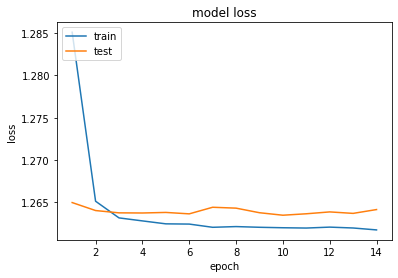

In [ ]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
vocab_size = 20000
embedding_dim = 128
hidden_units = 128
num_classes = 6

abc = keras.Sequential()
abc.add(keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
abc.add(keras.layers.LSTM(hidden_units, return_sequences = True))
abc.add(keras.layers.Dropout(0.3))
abc.add(keras.layers.Dense(16, activation='relu'))
abc.add(keras.layers.LSTM(60))
abc.add(keras.layers.Dropout(0.3))
abc.add(keras.layers.Dense(6, activation='relu'))
abc.add(keras.layers.Dense(num_classes, activation = 'softmax'))
abc.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 128)         2560000   
                                                                 
 lstm_32 (LSTM)              (None, None, 128)         131584    
                                                                 
 dropout_24 (Dropout)        (None, None, 128)         0         
                                                                 
 dense_23 (Dense)            (None, None, 16)          2064      
                                                                 
 lstm_33 (LSTM)              (None, 60)                18480     
                                                                 
 dropout_25 (Dropout)        (None, 60)                0         
                                                                 
 dense_24 (Dense)            (None, 6)               

In [ ]:
abc.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
epochs = 100

In [ ]:
history = abc.fit(x_train_tensor, y_train,  
                    batch_size = 512, epochs = 10000, callbacks=[es, mc], validation_data =(x_test_tensor, y_test))

Epoch 1/10000
313/313 [==============================] - ETA: 0s - loss: 1.5412 - accuracy: 0.3487
Epoch 1: val_loss did not improve from 1.26347
313/313 [==============================] - 485s 1s/step - loss: 1.5412 - accuracy: 0.3487 - val_loss: 1.2668 - val_accuracy: 0.4050
Epoch 2/10000
313/313 [==============================] - ETA: 0s - loss: 1.2658 - accuracy: 0.4062
Epoch 2: val_loss did not improve from 1.26347
313/313 [==============================] - 432s 1s/step - loss: 1.2658 - accuracy: 0.4062 - val_loss: 1.2644 - val_accuracy: 0.4050
Epoch 3/10000
313/313 [==============================] - ETA: 0s - loss: 1.2633 - accuracy: 0.4063
Epoch 3: val_loss did not improve from 1.26347
313/313 [==============================] - 431s 1s/step - loss: 1.2633 - accuracy: 0.4063 - val_loss: 1.2637 - val_accuracy: 0.4050
Epoch 4/10000
313/313 [==============================] - ETA: 0s - loss: 1.2624 - accuracy: 0.4063
Epoch 4: val_loss did not improve from 1.26347
313/313 [===========

In [ ]:
print(history.history)

{'loss': [1.5412018299102783, 1.265771746635437, 1.2632871866226196, 1.2624433040618896, 1.2620774507522583, 1.2620409727096558, 1.2620551586151123, 1.2619414329528809, 1.2621066570281982, 1.2620311975479126, 1.2617865800857544, 1.2617485523223877, 1.26175856590271, 1.261831283569336, 1.261826753616333, 1.2617263793945312, 1.2616914510726929], 'accuracy': [0.3486862778663635, 0.4061628580093384, 0.40625664591789246, 0.4062753915786743, 0.40615659952163696, 0.4062753915786743, 0.40628790855407715, 0.40628790855407715, 0.4062691628932953, 0.4062753915786743, 0.40628165006637573, 0.40628790855407715, 0.40628165006637573, 0.40628165006637573, 0.40628790855407715, 0.40628790855407715, 0.40628790855407715], 'val_loss': [1.2668322324752808, 1.2643626928329468, 1.2636638879776, 1.26377534866333, 1.2636007070541382, 1.2643028497695923, 1.2635432481765747, 1.2634919881820679, 1.2634310722351074, 1.2634844779968262, 1.263488531112671, 1.263474941253662, 1.2634185552597046, 1.264846682548523, 1.26

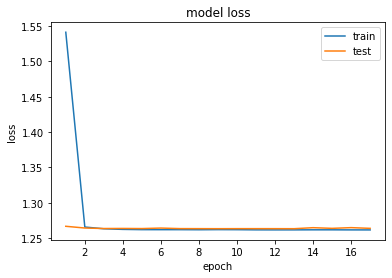

In [ ]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

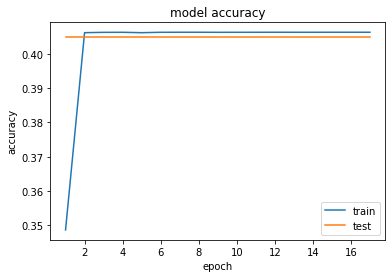

In [ ]:
epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()